























# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.26 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.2 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.2 MB/s eta 0:00:00


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connecting the google drive to retrive the data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [ ]:
# Reading the data
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/foodhub_order.csv")

In [ ]:
# Viewing the first 5 rows.
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Checking out the shape of the dataset .
df.shape

(1898, 9)

#### Observations:


*   There are 1898 rows and 9 columns in the data.





### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Obtaining general information about the dataset .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB




#### Observations:
The *restaurant_name* , *cuisine_type* , *day_of_the_week* and *rating*  columns  are categorical while the rest are numerical in nature.




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Checking for any missing values in the dataset.
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:

*   There are no missing values in the data.




In [ ]:
#Observing first 5 rows in the dataset after dropping customer_id and ordr_id column .
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Generating statistical summary of all the numerical columns.
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

*   Average time to prepare food is around 27 min, while minimum is 20 min and maximum is 35 min.
*   Average cost of the order is 16.50 dollars, while 50 % order cost less than 14.14 dollars. Minimum cost of the order is 4.47 dollar and maximum is around 35 dollars.
*  Average time to deliver the order after pickup is 24 minutes. Fatest time to deliever an order was 15 min and longest was 33 minutes.







### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Calulating counts of all the unique values in the rating column.

df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:


*   Total of 736 orders are not rated.
*   588 orders are given rating of 5. 386 orders are given rating of 4 and 188 orders are given rating of 3.








### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Now we have got a preliminary idea about the dataset. Let us now see the distribution of each of the columns to get a better understanding. Let us start with the numerical columns and use the histplot and boxplot to plot their distribution.

**Distribution of 'Cost_of_the_order'**

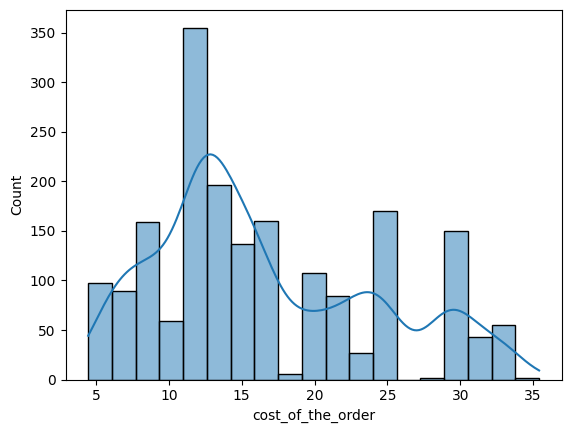

In [ ]:
# Understanding  distribution of the cost_of_the_order .
sns.histplot(data=df, x='cost_of_the_order', kde=True);


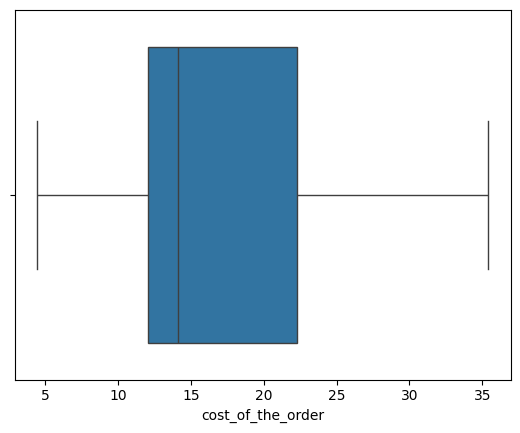

In [ ]:
#plotting boxplot to understand distribution and outlier of the cost_of_the_order.
sns.boxplot(data=df, x='cost_of_the_order');

 Observations


*  The  *cost_of_the_order* column is slightly right-skewed.
*  Around 50%  of orders cost between 12 to 23 dollar, while highest amount of orders(350) cost around 12 dollars.
*  Minimum cost is at 5 dollars and maximum cost is at 35 dollars.








**Distribution of the food_preparation_time**

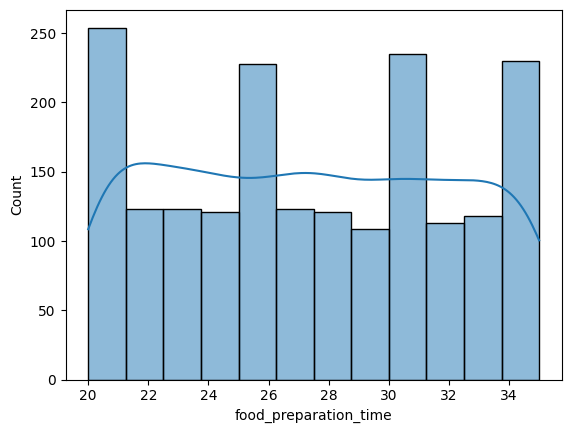

In [ ]:
# Understanding the distribution of food_prepration time column.
sns.histplot(data=df, x='food_preparation_time', kde=True);

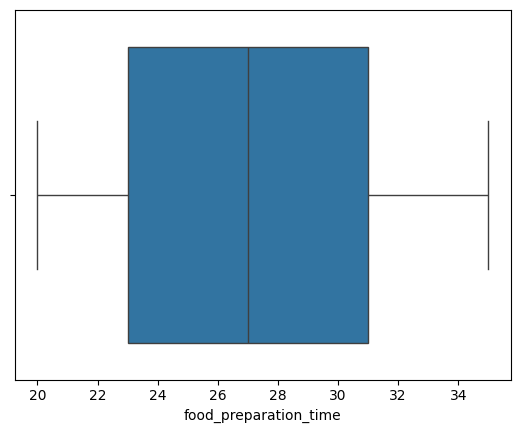

In [ ]:
#plotting boxplot to understand distribution and outlier of the food_preparation_time.
sns.boxplot(data=df, x='food_preparation_time');

Observations:
*   Half of the orders take between 23 to 31 mins to prepare.
*   Average time to prepare any order is 27 mins.
*   The *food_prepration_time* column is almost symmetrical with no outliers.





**Distribution of the delivery time**

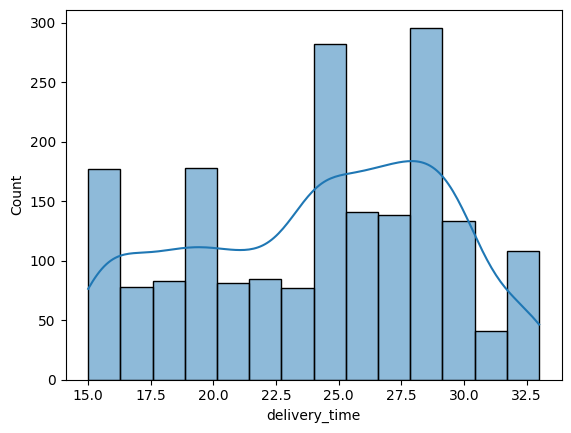

In [ ]:
# plotting histplot to understand distribution of the delivery_time.
sns.histplot(data=df, x='delivery_time', kde=True);

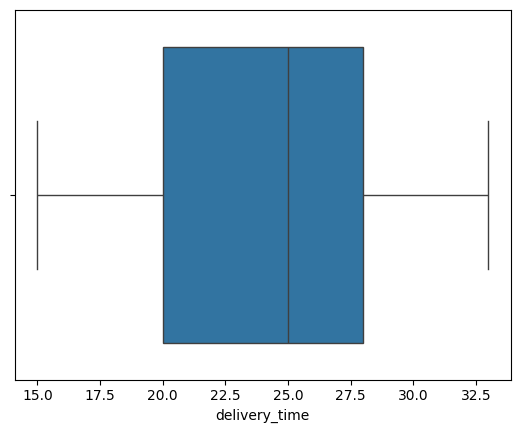

In [ ]:
#plotting boxplot to understand distribution of the delivery_time
sns.boxplot(data=df, x='delivery_time');

Observation:


*   The delivery_time column is slightly left skewed.


*   Around 50 % of orders are delievered in 20 to 28 mins.
*   Average delivery time is around 25 mins.
*   Maximum delivery time is 33 mins and minimum time is 15 mins.








**Now lets understand distribution of the categorical columns.**

**Understand distribution of Cuisine type.**

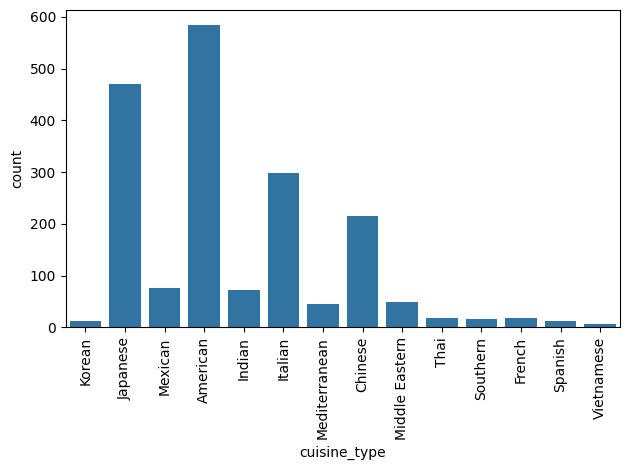

In [ ]:
#Plotting countplot to understand distribution of the cuisine_type column.
sns.countplot(data=df, x='cuisine_type');
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()  # Avoids cutting off labels
plt.show()

Observation:


*  Most ordered cuisine is American and least ordered is Vietnamese.
*  American, Japanese,Italian and chinese are among the most ordered cuisine type.



**Understanding distribution of day of the week.**

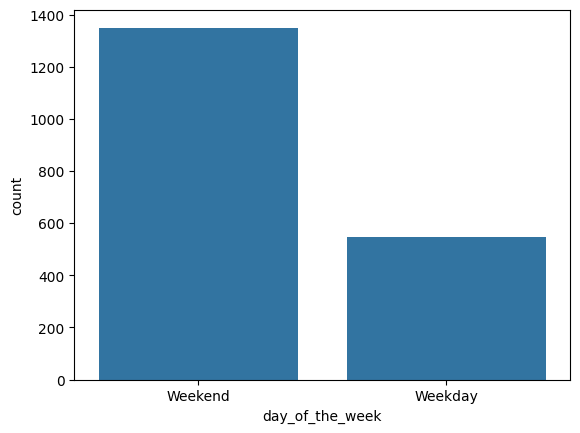

In [ ]:
#Plotting countplot to understand the distribution of day_of_the_week column
sns.countplot(data=df, x='day_of_the_week');


Observations:


*   More orders are recieved over the weekend compared to the weekday .

*   Around 1350 orders are recieved on the weekend and 550 orders on weekdays.



**Understanding the distribution of Restaurants name.**

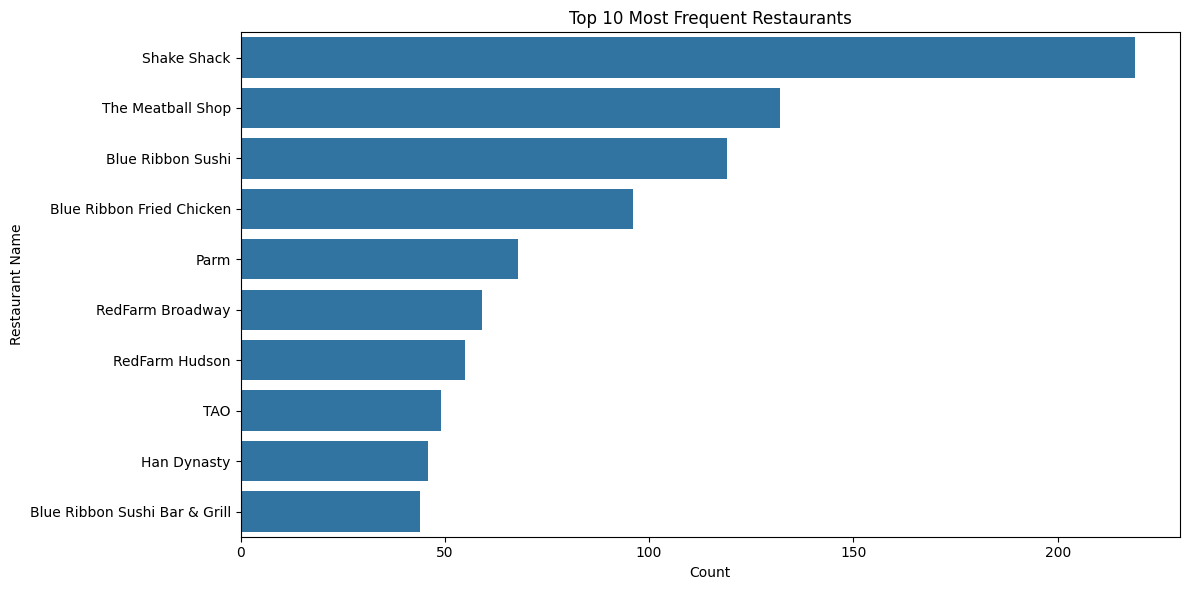

In [ ]:
#Plotting count plot to observe distribution of restaurant_name column
# Get top 10 restaurants by count
top_restaurants = df['restaurant_name'].value_counts().nlargest(10).index

# Filter data for only top restaurants
filtered_df = df[df['restaurant_name'].isin(top_restaurants)]

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(y='restaurant_name', data=filtered_df, order=top_restaurants)
plt.title('Top 10 Most Frequent Restaurants')
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.show()

In [ ]:
#Total orders generated by top 10 restaurants.
df['restaurant_name'].value_counts().nlargest(10).sum()

887

Observation:


*   Shake shack is the most popular restaurant to order food. 'The Matball Shop' and 'Blue Ribbon Sushi' are right behind it.
*   Top ten restaurants generates around 887 orders out of total 1898 orders,thats aorund 46.7 % of total orders.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Top 5 restaurants in terms of the number of the order received
df['restaurant_name'].value_counts().nlargest(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
Top 5 restaurants are :

1.   Shake shack
2.   The Meatball Shop
3.   BlueRibbon Sushi
4.   Blue Ribbon Fried chicken
5.   Parm




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Find the most popular cuisine type ordered on weekends
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
#df[df['day_of_the_week'] == 'Weekend']   -> Filter the DataFrame to include only rows where the day is 'Weekend'
#['cuisine_type']                         -> Select the 'cuisine_type' column from the filtered rows
#.value_counts()                          -> Count how many times each cuisine type appears on weekends
#.idxmax()                                -> Return the cuisine type with the highest frequency (i.e., most popular on weekends)


'American'

#### Observations:
The most popular cuisine on weekends is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
 # Calculate the percentage of orders with cost greater than $20
(df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]) * 100
# df['cost_of_the_order'] > 20      -> creates a Boolean mask for orders over $20
# df[...].shape[0]                  -> counts how many such orders exist
# df.shape[0]                       -> total number of orders
# (...) / df.shape[0] * 100         -> computes the percentage


29.24130663856691

#### Observations:
29.24 % of the orders costed more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate the average delivery time across all orders
df['delivery_time'].mean()

24.161749209694417

#### Observations:
Mean delivery time to deliver an order is 24.16 mins.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Finding Ids of top 3 frequent customer and the number of orders they have placed.

df['customer_id'].value_counts().head(3)
#df['customer_id']            -> Select the 'customer_id' column from the DataFrame
#.value_counts()              -> Count the number of times each customer ID appears (i.e., number of orders per customer)
#.head(3)                     -> Return the top 3 customers with the highest number of orders

,count
customer_id,
52832,13
47440,10
83287,9


Observations:
The top three customers who placed highest orders are as follows:

1.   Customer_id 52832 has placed 13 orders.
2.   Customer_id 47440 has placed 10 orders.
3.   customer_id 83287 has placed 9 orders.



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Heatmap to see coreelation between numerical values in data set** .

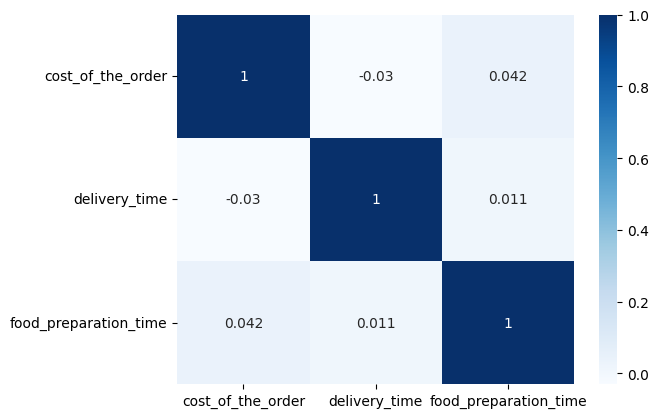

In [ ]:
sns.heatmap(data=df[['cost_of_the_order','delivery_time','food_preparation_time']].corr(), cmap='Blues', annot=True);


Observation:


* Heatmaps shows there is no strong linear relation between cost_of_the_order, delivery_time ,ratings and food_prepration_time column .




**Pairplot to understand corelation between all the values.**


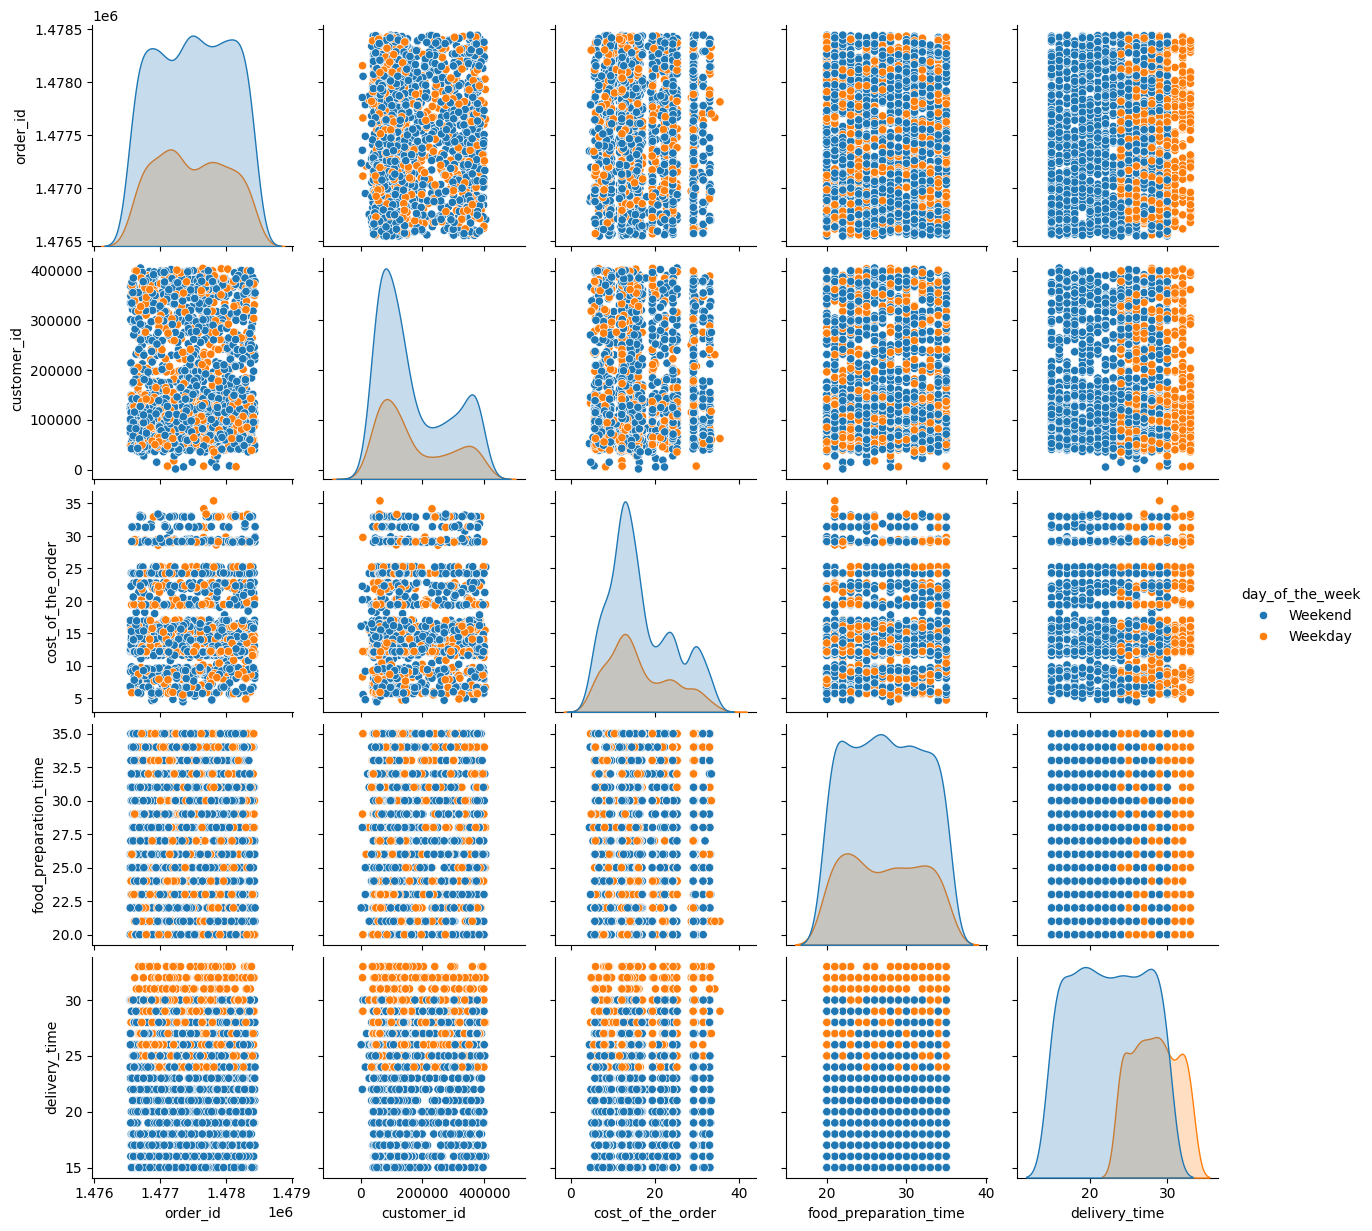

In [ ]:
#Pairplot to understand relationship between values.
sns.pairplot(df, hue='day_of_the_week');

Observations:
*   deilvery time shows some correlation  with rating and cost of the order.





**Further exploring delivery time with  cost of the order**

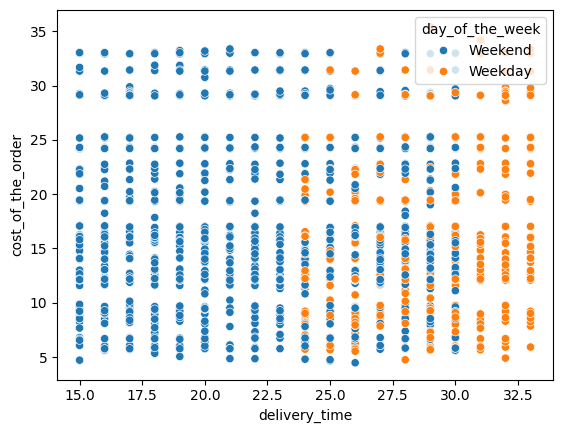

In [ ]:
#Understanding corelation between delievry time and cost of the order
sns.scatterplot(data=df, x='delivery_time', y='cost_of_the_order',hue='day_of_the_week');

Observation:
Delivery time on weekend is generally less compared to weekday.

**Understanding relation between delivery time and ratings.**

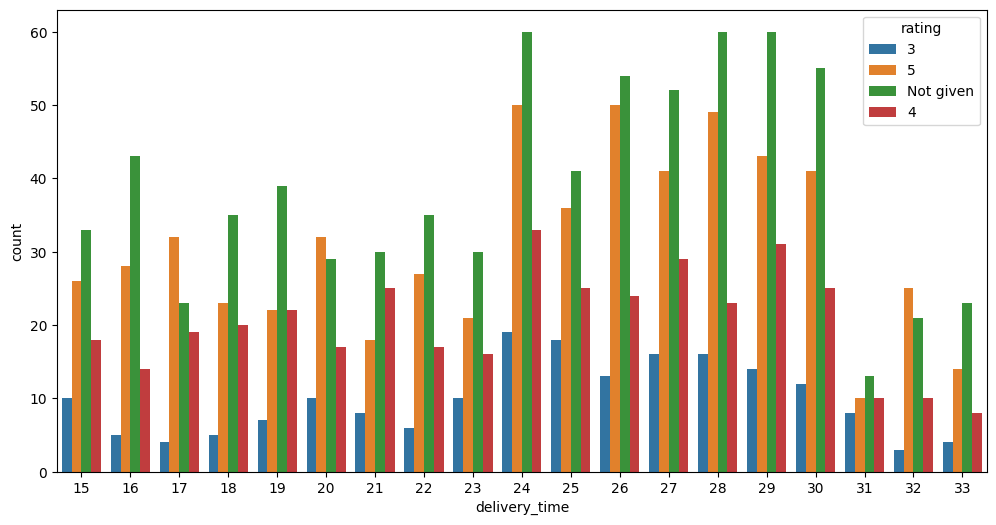

In [ ]:
#Understanding the relation between delivery time and ratings.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='delivery_time', hue='rating');
plt.show()

Observation:
Orders that took 24-30 mins to deliver got more 5 ratings.

**Exploring correlation betweencuisine type with rating, food preparation time, delivery time and cost of the order.**

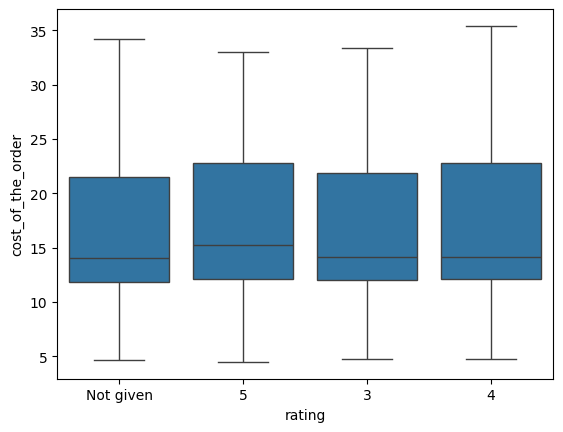

In [ ]:
#Rating vrs Cost _of_the_order
sns.boxplot(x='rating', y='cost_of_the_order', data=df);

Observation:
* Orders that recieved 5 star rating are on average $15 .

**Understanding relation between Rating and food prepration time**

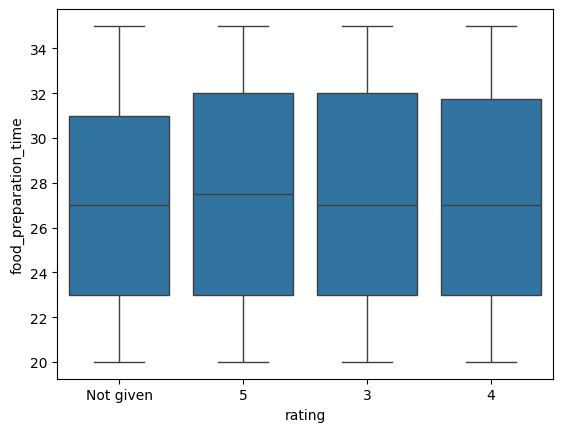

In [ ]:
#Rating vrs food preparation time


sns.boxplot(x='rating', y='food_preparation_time', data=df);


Observation:
Orders that  have recieved 5 star rating takes a little more to prepare on average compared to the orders that have recieved 4 and 3 star rating.

**Understanding realtion between Cuisine type and rating.**

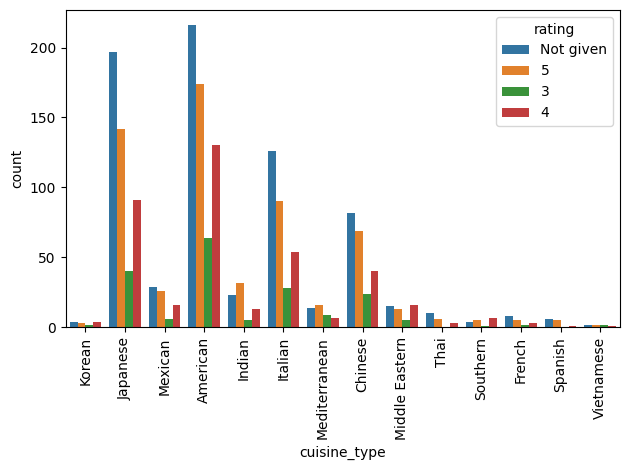

In [ ]:
#understanding the corelation between cuisine_type and rating
sns.countplot(x='cuisine_type', hue='rating', data=df)


# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()  # Avoids cutting off labels
plt.show()



Observation:


*   American cuisine has recieved highest 5 star rating follweed by Japanese and Italian cuisine
*   Least 5 star rating and overall ratings are for Vietnamese cuisine.



**Understanding relation between cuisine type and food prepration time**

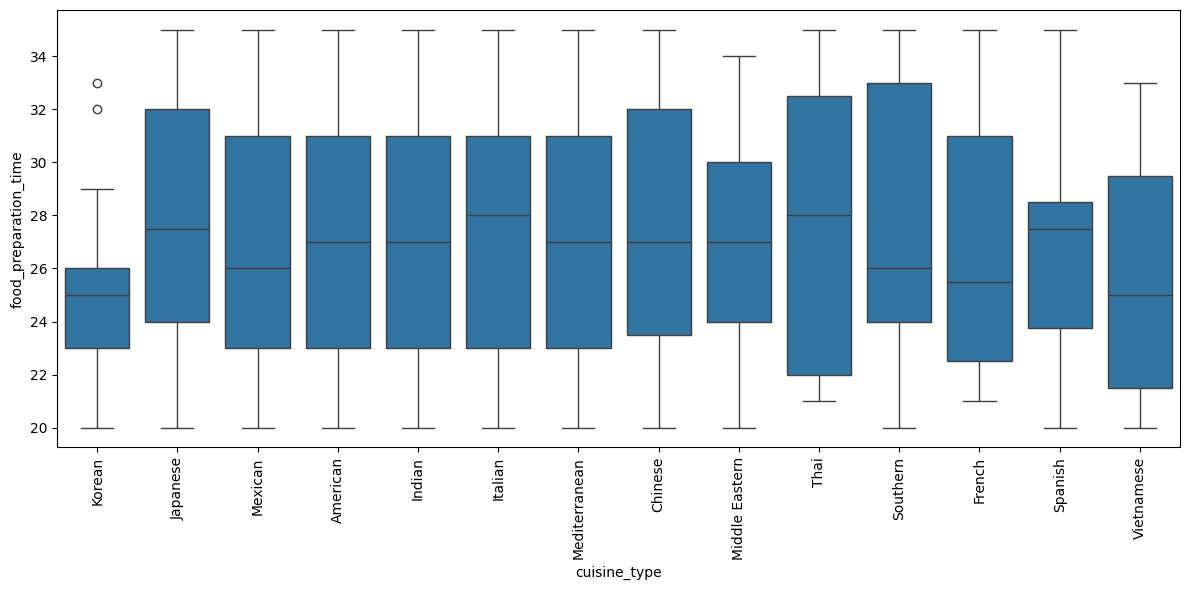

In [ ]:
#Understanding the correlation between cuisine type and food preparation time by plotting barplot.
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df);
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()  # Avoids cutting off labels
plt.show()




Observation:
Korean cuisine takes least time to prepare . Thai amd Italian takes longest time to prepare.
On an average it atkes 25-28 mins for any order to get prepared.


**Understanding relation between cuisine type and delivery time**

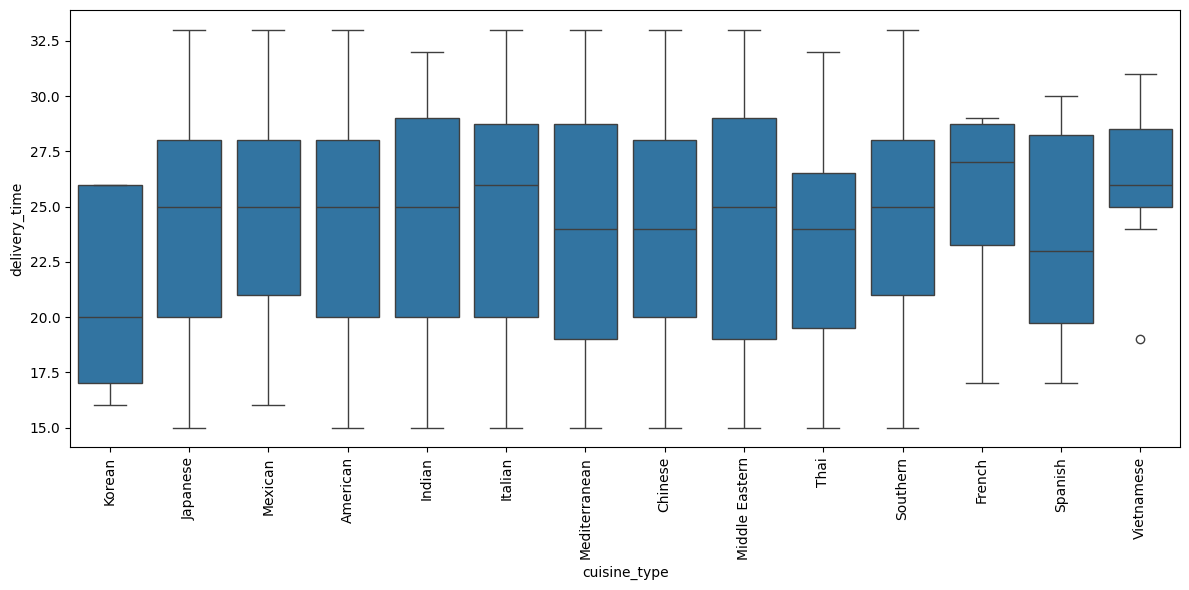

In [ ]:
#Plotting barplot to understand correlation between cuisine type and delivery time.
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='delivery_time', data=df);
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()  # Avoids cutting off labels
plt.show()

Observation:
Vietnamese cuisine food orders take longest time to get delivered and korean cuisine food orders take shortest time to get delivered.

**Understand relationship between cuisine type and cost of the order**

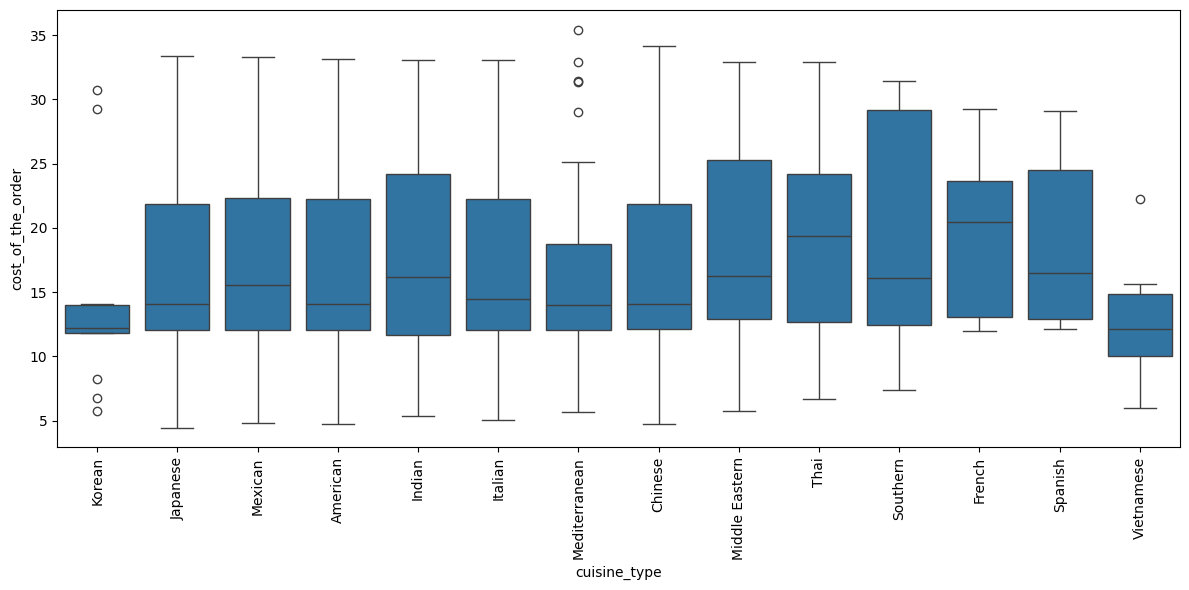

In [ ]:
#Understand relationship between cuisine type and cost of the order
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df);
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()  # Avoids cutting off labels
plt.show()






Observation:
French cuisine is the most expensive cuisine with average cost of around 20 dollars while Vietnamese cuisine is the cheapest cuisine with average cost of order of 13 dollars.


**Understanding relation between cuisine type and preparation time**

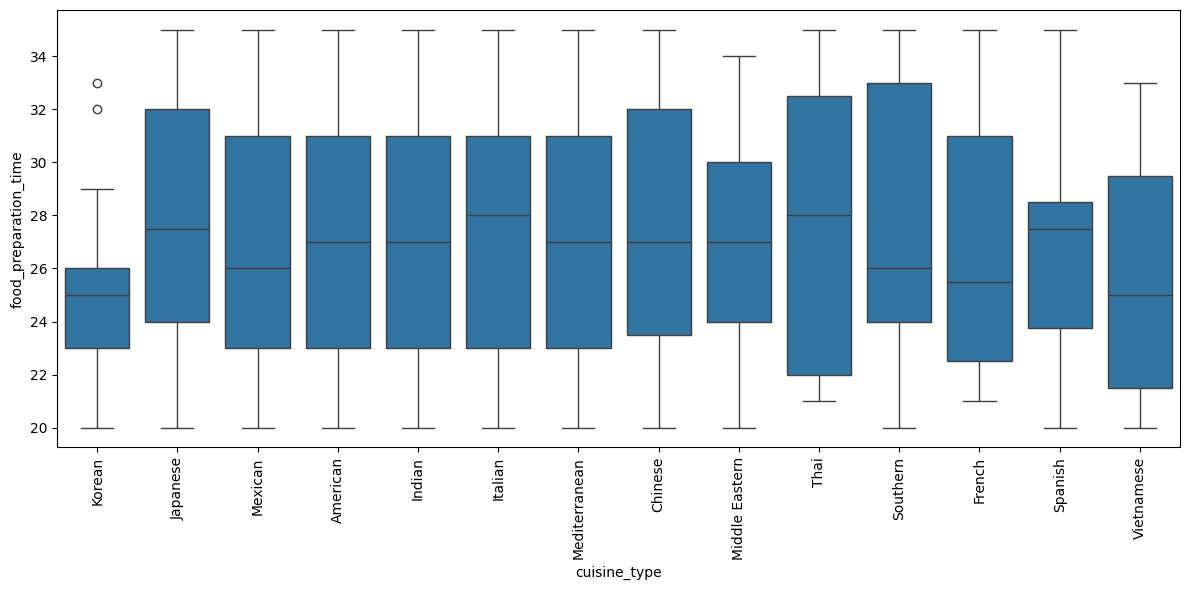

In [ ]:
# Cuisine type vrs preparation time
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df);
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.tight_layout()  # Avoids cutting off labels
plt.show()

Observation:


*  Thai,Italian and Japanese cuisine takes highest to prepare.
*  Korean and Vietnamese takes least average time to prepare.



**Understand correlation between cost of the order with day of the week and ratings.**

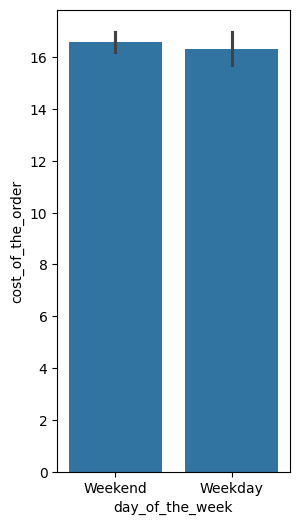

In [ ]:
#Understanding the correlation betweeen cost_of_the_order and day_of _the_week by plotting barplot.
plt.figure(figsize=(3, 6))
sns.barplot(x='day_of_the_week', y='cost_of_the_order', data=df, estimator='mean');


Observation:
Around same amount of revenue is generated over the weekend as compared to weekday.

**Understanding the correlation betweeen cost_of_the_order and rating by plotting barplot.**

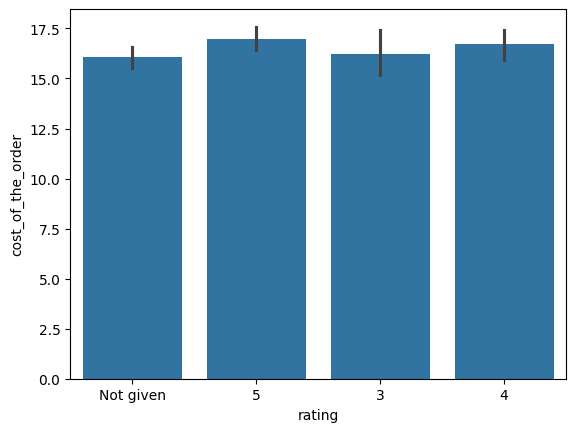

In [ ]:
#  cost_of_the_order and rating by plotting barplot.
sns.barplot(x='rating', y='cost_of_the_order', data=df, estimator='mean');


Observation:
Orders that costed more than 15 dollars have recieved ratings compared to those costing less than 15 dollars.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Find mean and count for each restaurant
#Convert the 'rating' column to numeric errors to Nan.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# Filter restaurants based on rating count and average
rating_avg = df.groupby('restaurant_name')['rating'].mean()

rating_count = df.groupby('restaurant_name')['rating'].count()

#Create a new dataframe to store rating average and rating count for easier extraction.
new_df = pd.DataFrame({'rating_avg': rating_avg, 'rating_count': rating_count})

#Finally filter restaurants that have both criteria match rating count more than 50 and average rating more than 4.
promotional_restaurants = new_df[(new_df['rating_count'] > 50) & (new_df['rating_avg'] > 4)]

#Print the name of all promotional restaurants
print(promotional_restaurants)



                           rating_avg  rating_count
restaurant_name                                    
Blue Ribbon Fried Chicken    4.328125            64
Blue Ribbon Sushi            4.219178            73
Shake Shack                  4.278195           133
The Meatball Shop            4.511905            84


#### Observations:
The restaurants that fullfill promotional offers are as follows:

1. Blue Ribbon Fried Chicken
2. Blue Ribbon Sushi
3. Shake Shack  
4. The Meatball Shop





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Orders that costed greater than 20 dollars
orders_20 = df[df['cost_of_the_order'] > 20]
#Orders that costed greater than 5 dollars and less than equal to 20 dollars
orders_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20) ]
# Calculate the total revenue generated
total_revenue = (orders_20['cost_of_the_order'] * 0.25).sum() + (orders_5['cost_of_the_order'] * 0.15).sum()
# Print the total revenue
print(total_revenue)


6166.303


#### Observations:
The total revenue generated by the company across all orders is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate totaltime required to deliver the food by adding food prepration time and delivery time .
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
#Count all the orders which has total_time more than 60
orders_more_than_60 = df[df['total_time'] > 60]

#Calculate what percentage is orders_more_than_60  in the column
percentage_order =  (orders_more_than_60.shape[0] / df.shape[0]) * 100
print(percentage_order)



10.537407797681771


#### Observations:
Around 10.53 % of all the orders takes more than 60 min to get delivered from the time order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate delivery time of the orders on weekdays
weekday_delivery_time = df[df['day_of_the_week'] != 'Weekend']['delivery_time']
#calculate delivery time of the orders on weekends
weekend_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time']
# Calculate the mean delivery time for weekdays and weekends
mean_weekday_delivery_time = weekday_delivery_time.mean()
mean_weekend_delivery_time = weekend_delivery_time.mean()
print('mean delivery time on weekdays is ' ,mean_weekday_delivery_time)
print('mean delivery time on weekend  is ',mean_weekend_delivery_time)

mean delivery time on weekdays is  28.340036563071298
mean delivery time on weekend  is  22.4700222057735


#### Observations:
It take less time on weekend to deliver any order compared to weekdays. Mean delivery time on the weekend is 22.47 compared to 28.34 on weekdays.



**Let us try to understand  how many 5 star , 4 star and 3 star ratings each restaurant is getting.**

In [ ]:
# Generate counts of each rating per restaurant
result = pd.crosstab(df['restaurant_name'], df['rating'])

# Optional: Rename columns for clarity
result = result.rename(columns={
    3: 'count_3_star',
    4: 'count_4_star',
    5: 'count_5_star'
})

# Ensure all expected rating columns exist
for col in ['count_3_star', 'count_4_star', 'count_5_star']:
    if col not in result.columns:
        result[col] = 0

# Reset index if you want a flat DataFrame
result = result.reset_index()

print(result)

# filter all restaurant that has 0 count_4_star and 0 count_5_star but not 0 in count_3_star
result = result[(result['count_4_star'] == 0) & (result['count_5_star'] == 0) & (result['count_3_star'] != 0)]


rating   restaurant_name  count_3_star  count_4_star  count_5_star
0             'wichcraft             0             0             1
1              12 Chairs             0             1             1
2        5 Napkin Burger             1             0             1
3              67 Burger             0             0             1
4                   Amma             0             1             1
..                   ...           ...           ...           ...
151       Zero Otto Nove             0             1             0
152                 brgr             1             0             0
153           da Umberto             0             0             1
154     ilili Restaurant             2             7             4
155            indikitch             0             1             1

[156 rows x 4 columns]


**Filter all the restaurants which is getting only 3 star rating thus concluding that customers are not very happy with such restaurants.**

In [ ]:
# filter all restaurant that has 0 count_4_star and 0 count_5_star but not 0 in count_3_star
result = result[(result['count_4_star'] == 0) & (result['count_5_star'] == 0) & (result['count_3_star'] != 0)]
print(result['restaurant_name'].tolist())

['Byblos Restaurant', 'Haveli Indian Restaurant', 'Nha Trang One', 'Pepe Giallo', "Sarabeth's West", 'Sushi Choshi', 'Woorijip', 'brgr']


Observation:

1.  Byblos Restaurant
2.  Haveli Indian Restaurant
3.  Nha Trang One
4.  Pepe Giallo
5.  Sarabeth's West
6.  Sushi Choshi
7. Woorijip
8. brgr

All these restaurants have recieved low rating.

**Let us create a datfarame that gives us clear understanding on average delivery time , average cost of the order , total no of restaurants , total revenue generated by each cuisine type.**

In [ ]:
#average cost of each cuisine type orders
cost_per_order = df.groupby('cuisine_type')['cost_of_the_order'].mean()
# average delivery time for each cuisinr type order
avg_delivery_time = df.groupby('cuisine_type')['delivery_time'].mean()
#count no of rstaurants in each cuisine type
total_restaurants = df.groupby('cuisine_type')['restaurant_name'].nunique()
#calculate revenue genrated by each cuisine type.
revenue = df.groupby('cuisine_type')['cost_of_the_order'].sum()
# Percentage of orders by cuisine type
Per_orders = df['cuisine_type'].value_counts(normalize=True)

**Now let us calulate profitabilty of each cuisine type based on cost/time along with percentage of order that cuisine type makes up .**

In [ ]:
final = pd.concat([cost_per_order,avg_delivery_time,total_restaurants,revenue], axis=1)

final.columns = ['cost_per_order', 'avg_delivery_time', 'total_restaurants', 'revenue']
# Calculate the profit_factor
profit_factor = cost_per_order/avg_delivery_time
Per_orders = df['cuisine_type'].value_counts(normalize=True)
# Add the profit_factor as a new column to the final DataFrame
final['profit_factor'] = profit_factor
final['Per_orders'] = Per_orders
print(final)

                cost_per_order  avg_delivery_time  total_restaurants  revenue  \
cuisine_type                                                                    
American             16.319829          24.193493                 41  9530.78   
Chinese              16.305209          23.855814                 16  3505.62   
French               19.793889          25.333333                  3   356.29   
Indian               16.919726          24.082192                 14  1235.14   
Italian              16.418691          24.567114                 31  4892.77   
Japanese             16.304532          24.131915                 29  7663.13   
Korean               14.001538          20.923077                  5   182.02   
Mediterranean        15.474783          23.586957                  5   711.84   
Mexican              16.933117          24.389610                 11  1303.85   
Middle Eastern       18.820612          24.081633                  7   922.21   
Southern             19.3005

Observation:

Athough American ,Japanese cusine are getting most order . Business will get benefited by getting more spanish, southern and thai orders as its profit_factor is highest. Amount of money generated by delivering these cuisine in the same time compared to any other cusine is highest,

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

    
*   Average time to prepare any order is 27 mins.
*   Around 50 % of orders are delievered in 20 to 28 mins.
*   Average delivery time is around 25 mins.
*   Maximum delivery time is 33 mins and minimum time is 15 mins.
*  Most ordered cuisine is American and least ordered is Vietnamese.
*  American, Japanese,Italian and chinese are among the most ordered cuisine type.

*   More orders are recieved over the weekend compared to the weekday .
*   Around 1350 orders are recieved on the weekend and 550 orders on weekdays.
*   Shake shack is the most popular restaurant to order food. 'The Matball Shop' and 'Blue Ribbon Sushi' are right behind it.
*   Top ten restaurants generates around 887 orders out of total 1898 orders,thats aorund 46.7 % of total orders.

*   American cuisine has recieved highest 5 star rating follweed by Japanese and Italian cuisine
*   Least 5 star rating and overall ratings are for Vietnamese cuisine.
*   All the cuisine takes more or less same time in terms of food preparation.
    
*   Vietnamese cuisine food orders take longest time to get delivered and korean cuisine food orders take shortest time to get delivered.
*   French cuisine is the most expensive cuisine with average cost of around 20 dollars while Vietnamese cuisine is the cheapest cuisine with average cost of order of 13 dollars.
*  Around same amount of revenue is generated over the weekend as compared to
   weekday.
*  Orders that costed more than 15 dollars have recieved ratings compared to
   those costing less than 15 dollars.
*  around 10.53 % of all the orders takes more than 60 min to get delivered  
  from the time order is placed.
*  It take less time on weekend to deliver any order compared to weekdays. Mean delivery time on the weekend is 22.47 compared to 28.34 on weekdays.


*  American and Japanese cuisine are getting most of the orders.

### Recommendations:

1.  Weekend sees a lot more order delivery compared to weekdays. We should hire more temp workers specifically for weekend deliveries.

2.  Top 4 restaurants pulls 25% of total orders. More workforce should be focused on those restaurant. If we can improve delivery time in these restaurants it may lead to better customer satisfaction which again in turn can  result in more orders.

3. Total 7 restaurants named -'Byblos Restaurant', 'Haveli Indian Restaurant', 'Nha Trang One', 'Pepe Giallo', "Sarabeth's West", 'Sushi Choshi', 'Woorijip', 'brgr', which has only recieved 3 star rating and never recieved 4 or 5 star rating can be deleted from the app and new restaurants can be added in order to provide more likable options.Alternatively  manpower used for these restaurants can be diverted to other more top restaurants.

4. Thai, Southern and Spanish cuisine is making most profit in terms of cost of the order/ delievery time. Since delivery time is more or less same for all cuisine type we can focus on deilvering more of this cuisine in order to generate better margin percentage cut on each order.




*  

In [ ]:
!jupyter nbconvert PYF_Project_LearnerNotebook_FullCode_Final --to html

[NbConvertApp] WARNING | pattern 'PYF_Project_LearnerNotebook_FullCode_Final' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answe